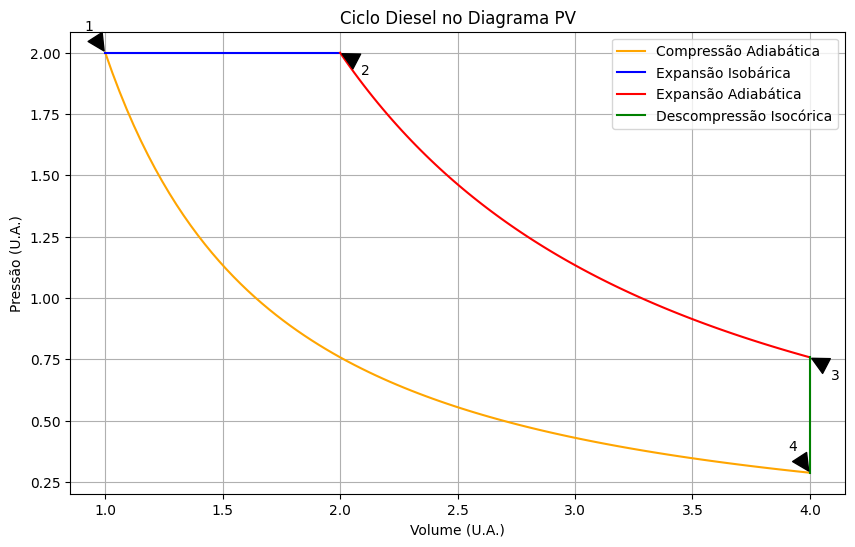

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Valor de gama, o coeficiente de expansão adiabática. Ele exprime a razão entre a capacidade térmica
# a pressão constante (Cp) e a capacidade térmica a volume constante (Cv), para um gás ideal.
# gamma = Cp/Cv = 1.4 para o ar a 20ºC (gás diatômico ideal) .
gamma = 1.4 

# Vamos escolher três valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O ponto 1 = (P1, V1) define o início do ciclo. Os valores e as unidades adotados são arbitrários e
# faremos nR = 1, por simplicidade.
V1 = 1.0
V2 = 2.0
V3 = V4 = 4.0 

# Ponto 1: Início do primeiro processo - expansão isobárica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
T1 = 2.0  # Temperatura no Ponto 1 do Diagrama PV.
P1 = T1 / V1  # Pressão no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - expansão isobárica do gás (T1≠T2).
# Temperatura no Ponto 2 do Diagrama PV não é a mesma que a do Ponto 1. 
P2 = P1
T2 = (V2 / V1) * T1      
# Gerando os pontos para a curva que representa a expansão isobárica do gás.
V_exp_isobarica = np.linspace(V1, V2, 100)
P_exp_isobarica = np.linspace(P1, P2, 100)

# Ponto 2: Início do segundo processo - expansão adiabática do gás. 
# No Ponto 2 do ciclo, o volume do gás é V2 e a pressão é P2:
# Ponto 3: Final do segundo processo - expansão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P3*V3^gamma = P2*V2^gamma. 
# Podemos encontrar o valor da pressão P3 usando os valores dos volumes V2 e V3, conhecendo P2.
P3 = P2 * (V2 / V3) ** gamma
# A temperatura no Ponto 3 é dada pela relação T*V^(gamma-1) = constante (expansão adiabática):
T3 = T2 * (V2 / V3)**(gamma-1)
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_exp_adiabatica = np.linspace(V2, V3, 100)
P_exp_adiabatica = P2 * ((V2 / V_exp_adiabatica) ** gamma)

# Ponto 3: Início do terceiro processo: resfriamento isocórico (volume constante) do gás. 
# No Ponto 3 do ciclo, a pressão é P3 e a temperatura é T3. 
# No ponto 4 do ciclo, a temperatura será T4, menor que T3:
T4 = T1 * (V1 / V4)**(gamma-1)
# Para um processo isocórico ou isovolumétrico (com volume constante), P4*T3 = P3*T4.
P4 = P3 * T4 / T3
# Gerando os pontos para a curva que representa a descompressão isocórica do gás.
P_descomp_isocorica = np.linspace(P3, P4, 100)
V_descomp_isocorica = np.linspace(V3, V4, 100)

# Ponto 4: Início do quarto processo - compressão adiabática do gás. 
# No Ponto 1 do ciclo, o volume do gás é V1 e a pressão é P1:
# Ponto 1: Final do quarto processo - compressão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P3*V3^gamma = P2*V2^gamma. 
# Podemos encontrar o valor da pressão P3 usando os valores dos volumes V2 e V3, conhecendo P2.
P1 = P4 * (V4 / V1) ** gamma
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_comp_adiabatica = np.linspace(V4, V1, 100)
P_comp_adiabatica = P4 * ((V4 / V_comp_adiabatica) ** gamma)

# Plotagem do diagrama PV.
plt.figure(figsize = (10, 6))
plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Expansão Isobárica')
plt.plot(V_exp_adiabatica, P_exp_adiabatica, 'r', label = 'Expansão Adiabática')
plt.plot(V_descomp_isocorica, P_descomp_isocorica, 'g', label = 'Descompressão Isocórica')
# plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.title('Ciclo Diesel no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', xy = (V1, P1), xytext = (V1 - 0.09, P1 + 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.annotate('2', xy = (V2, P2), xytext = (V2 + 0.09, P2 - 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.annotate('3', xy = (V3, P3), xytext = (V3 + 0.09, P3 - 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.annotate('4', xy = (V4, P4), xytext = (V4 - 0.09, P4 + 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.show()

array([4.        , 3.96969697, 3.93939394, 3.90909091, 3.87878788,
       3.84848485, 3.81818182, 3.78787879, 3.75757576, 3.72727273,
       3.6969697 , 3.66666667, 3.63636364, 3.60606061, 3.57575758,
       3.54545455, 3.51515152, 3.48484848, 3.45454545, 3.42424242,
       3.39393939, 3.36363636, 3.33333333, 3.3030303 , 3.27272727,
       3.24242424, 3.21212121, 3.18181818, 3.15151515, 3.12121212,
       3.09090909, 3.06060606, 3.03030303, 3.        , 2.96969697,
       2.93939394, 2.90909091, 2.87878788, 2.84848485, 2.81818182,
       2.78787879, 2.75757576, 2.72727273, 2.6969697 , 2.66666667,
       2.63636364, 2.60606061, 2.57575758, 2.54545455, 2.51515152,
       2.48484848, 2.45454545, 2.42424242, 2.39393939, 2.36363636,
       2.33333333, 2.3030303 , 2.27272727, 2.24242424, 2.21212121,
       2.18181818, 2.15151515, 2.12121212, 2.09090909, 2.06060606,
       2.03030303, 2.        , 1.96969697, 1.93939394, 1.90909091,
       1.87878788, 1.84848485, 1.81818182, 1.78787879, 1.75757

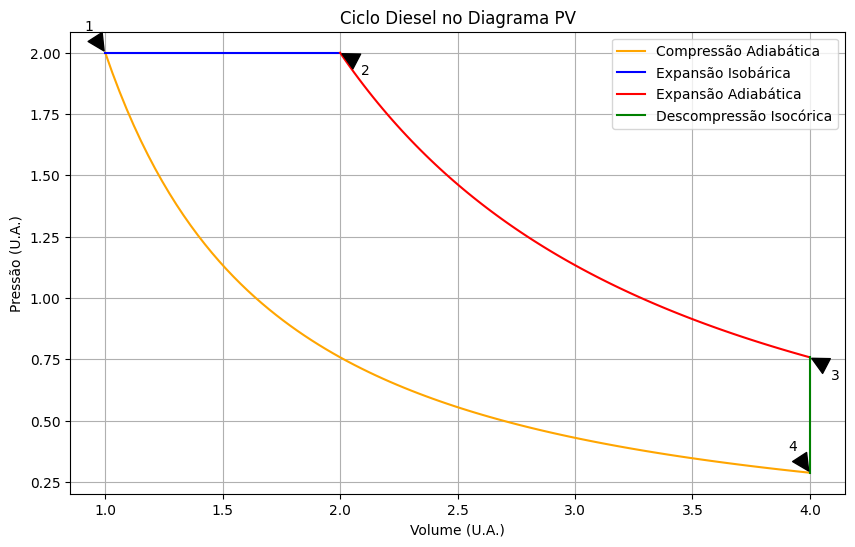

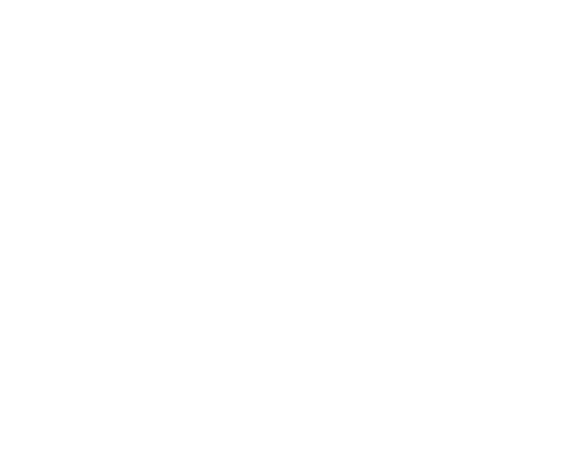

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Valor de gama, o coeficiente de expansão adiabática. Ele exprime a razão entre a capacidade térmica
# a pressão constante (Cp) e a capacidade térmica a volume constante (Cv), para um gás ideal.
# gamma = Cp/Cv = 1.4 para o ar a 20ºC (gás diatômico ideal) .
gamma = 1.4 

# Vamos escolher três valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O ponto 1 = (P1, V1) define o início do ciclo. Os valores e as unidades adotados são arbitrários e
# faremos nR = 1, por simplicidade.
V1 = 1.0
V2 = 2.0
V3 = V4 = 4.0 

# Ponto 1: Início do primeiro processo - expansão isobárica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
T1 = 2.0  # Temperatura no Ponto 1 do Diagrama PV.
P1 = T1 / V1  # Pressão no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - expansão isobárica do gás (T1≠T2).
# Temperatura no Ponto 2 do Diagrama PV não é a mesma que a do Ponto 1. 
P2 = P1
T2 = (V2 / V1) * T1      
# Gerando os pontos para a curva que representa a expansão isobárica do gás.
V_exp_isobarica = np.linspace(V1, V2, 100)
P_exp_isobarica = np.linspace(P1, P2, 100)

# Ponto 2: Início do segundo processo - expansão adiabática do gás. 
# No Ponto 2 do ciclo, o volume do gás é V2 e a pressão é P2:
# Ponto 3: Final do segundo processo - expansão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P3*V3^gamma = P2*V2^gamma. 
# Podemos encontrar o valor da pressão P3 usando os valores dos volumes V2 e V3, conhecendo P2.
P3 = P2 * (V2 / V3) ** gamma
# A temperatura no Ponto 3 é dada pela relação T*V^(gamma-1) = constante (expansão adiabática):
T3 = T2 * (V2 / V3)**(gamma-1)
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_exp_adiabatica = np.linspace(V2, V3, 100)
P_exp_adiabatica = P2 * ((V2 / V_exp_adiabatica) ** gamma)

# Ponto 3: Início do terceiro processo: resfriamento isocórico (volume constante) do gás. 
# No Ponto 3 do ciclo, a pressão é P3 e a temperatura é T3. 
# No ponto 4 do ciclo, a temperatura será T4, menor que T3:
T4 = T1 * (V1 / V4)**(gamma-1)
# Para um processo isocórico ou isovolumétrico (com volume constante), P4*T3 = P3*T4.
P4 = P3 * T4 / T3
# Gerando os pontos para a curva que representa a descompressão isocórica do gás.
P_descomp_isocorica = np.linspace(P3, P4, 100)
V_descomp_isocorica = np.linspace(V3, V4, 100)

# Ponto 4: Início do quarto processo - compressão adiabática do gás. 
# No Ponto 1 do ciclo, o volume do gás é V1 e a pressão é P1:
# Ponto 1: Final do quarto processo - compressão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P3*V3^gamma = P2*V2^gamma. 
# Podemos encontrar o valor da pressão P3 usando os valores dos volumes V2 e V3, conhecendo P2.
P1 = P4 * (V4 / V1) ** gamma
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_comp_adiabatica = np.linspace(V4, V1, 100)
P_comp_adiabatica = P4 * ((V4 / V_comp_adiabatica) ** gamma)

# Plotagem do diagrama PV.
plt.figure(figsize = (10, 6))
plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Expansão Isobárica')
plt.plot(V_exp_adiabatica, P_exp_adiabatica, 'r', label = 'Expansão Adiabática')
plt.plot(V_descomp_isocorica, P_descomp_isocorica, 'g', label = 'Descompressão Isocórica')
# plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.title('Ciclo Diesel no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', xy = (V1, P1), xytext = (V1 - 0.09, P1 + 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.annotate('2', xy = (V2, P2), xytext = (V2 + 0.09, P2 - 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.annotate('3', xy = (V3, P3), xytext = (V3 + 0.09, P3 - 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.annotate('4', xy = (V4, P4), xytext = (V4 - 0.09, P4 + 0.09), arrowprops = dict(facecolor = 'black', shrink = 0.09))
plt.show()

# Função de inicialização para limpar o gráfico antes de começar a animação
def init():
    plt.cla()
    plt.xlabel('Volume (U.A.)')
    plt.ylabel('Pressão (U.A.)')
    plt.title('Ciclo Diesel no Diagrama PV')
    plt.grid(True)
    return plt.gca(),

# Função de atualização que será chamada para cada frame da animação
def update(frame):
    plt.cla()
    plt.xlabel('Volume (U.A.)')
    plt.ylabel('Pressão (U.A.)')
    plt.title('Ciclo Diesel no Diagrama PV')
    plt.grid(True)
    
    if frame < 100:
        plt.plot(V_exp_isobarica[:frame], P_exp_isobarica[:frame], 'b', label='Expansão Isobárica')
    elif frame < 200:
        plt.plot(V_exp_adiabatica[:frame-100], P_exp_adiabatica[:frame-100], 'r', label='Expansão Adiabática')
    elif frame < 300:
        plt.plot(V_descomp_isocorica[:frame-200], P_descomp_isocorica[:frame-200], 'g', label='Descompressão Isocórica')
    else:
        plt.plot(V_comp_adiabatica[:frame-300], P_comp_adiabatica[:frame-300], 'orange', label='Compressão Adiabática')
    
    plt.legend()
    return plt.gca(),

# Criação da animação
ani = FuncAnimation(plt.gcf(), update, frames=400, init_func=init, blit=True)

# Exibição da animação
plt.show()


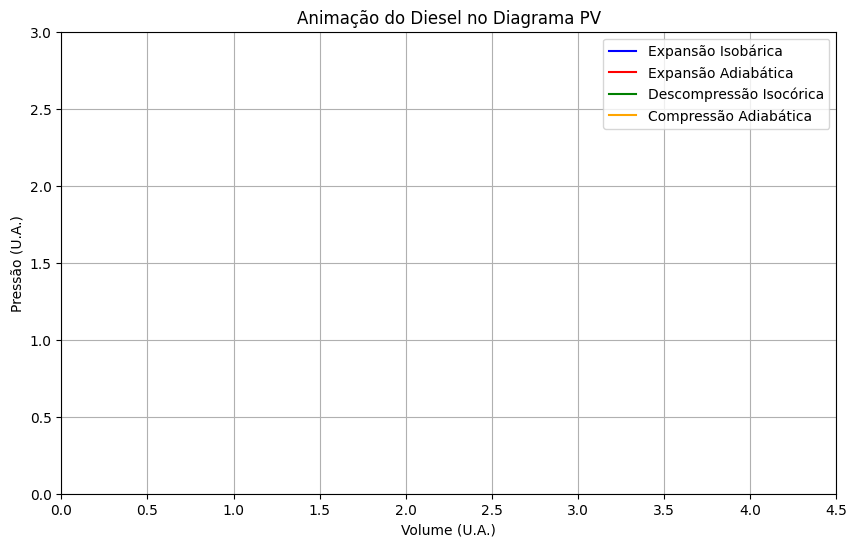

In [31]:
# plt.rcParams['animation.embed_limit'] = 256
# # Criando a figura e os eixos
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_ylim(0, 3)
# ax.set_xlim(0, 4.5)
# ax.set_xlabel('Volume (U.A.)')
# ax.set_ylabel('Pressão (U.A.)')
# ax.set_title('Animação do Diesel no Diagrama PV')

# # Inicializando as curvas como linhas vazias
# line_exp_isobarica, = ax.plot([], [], 'b', label='Expansão Isobárica')
# line_exp_adiabatica, = ax.plot([], [], 'r', label='Expansão Adiabática')
# line_descomp_isocorica, = ax.plot([], [], 'g', label='Descompressão Isocórica')
# line_comp_adibatica, = ax.plot([], [], 'orange', label='Compressão Adiabática')

# # Adicionando a legenda e a grade
# ax.legend()
# ax.grid(True)

# # Função de inicialização, chamada apenas uma vez
# def init():
#     line_exp_isobarica.set_data([], [])
#     line_exp_adiabatica.set_data([], [])
#     line_descomp_isocorica.set_data([], [])
#     line_comp_adibatica.set_data([], [])
#     return line_exp_isobarica, line_exp_adiabatica, line_descomp_isocorica, line_comp_adibatica

# # # Função de animação
# # def animate(frame):
# #     # Atualizando os dados das curvas
# #     if frame < len(V_exp_isobarica):
# #         line_exp_isobarica.set_data(V_exp_isobarica[:frame], P_exp_isobarica[:frame])
# #     elif frame < len(V_exp_isobarica) + len(V_exp_adiabatica):
# #         line_exp_adiabatica.set_data(V_exp_adiabatica[:frame-len(V_exp_isobarica)], P_exp_adiabatica[:frame-len(V_exp_isobarica)])
# #     elif frame < len(V_exp_isobarica) + len(V_exp_adiabatica) + len(V_descomp_isocorica):
# #         line_descomp_isocorica.set_data(V_descomp_isocorica[:frame-(len(V_exp_isobarica)+len(V_exp_adiabatica))], P_descomp_isocorica[:frame-(len(V_exp_isobarica)+len(V_exp_adiabatica))])
# #     else:
# #         line_comp_adibatica.set_data(V_comp_adiabatica[:frame-(len(V_exp_isobarica)+len(V_exp_adiabatica)+len(V_descomp_isocorica))], P_comp_adiabatica[:frame-(len(V_exp_isobarica)+len(V_comp_adiabatica)+len(V_descomp_isocorica))])

# #     return line_exp_isobarica, line_exp_adiabatica, line_descomp_isocorica, line_comp_adibatica

# # # Configurando a animação
# # total_frames = len(V_exp_isobarica) + len(V_exp_adiabatica) + len(V_descomp_isocorica) + len(V_comp_adiabatica)
# # ani = FuncAnimation(fig, animate, frames=total_frames, init_func=init, blit=True, interval=100)

# # # Exibindo a animação usando JSAnimation
# # HTML(ani.to_jshtml())


# AREA DE TESTES

In [32]:
# plt.rcParams['animation.embed_limit'] = 256
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_ylim(0, 1.5)
# ax.set_xlim(0.5, 2.3)
# ax.set_xlabel('Volume (U.A.)')
# ax.set_ylabel('Pressão (U.A.)')
# ax.set_title('Animação do Ciclo Diesel no Diagrama PV')


# # Inicializando as curvas como linhas vazias
# line_comp_adiabatica, = ax.plot([], [], 'orange', label='Compressão Adiabatica')
# line_exp_isotermica, = ax.plot([], [], 'b', label='Expansão Isotérmica')
# line_exp_adiabatica, = ax.plot([], [], 'r', label='Expansão Adiabática')
# line_comp_isotermica, = ax.plot([], [], 'g', label='Resfriamento Isocórico')

# # Adicionando a legenda e a grade
# ax.legend()
# ax.grid(True)

# # Função de inicialização, chamada apenas uma vez
# def init():
#     line_comp_adiabatica.set_data([], [])
#     line_exp_isotermica.set_data([], [])
#     line_exp_adiabatica.set_data([], [])
#     line_resf_isocorico.set_data([], [])
    
#     return line_comp_adiabatica, line_exp_isotermica, line_exp_adiabatica, line_comp_isotermica, line_comp_adiabatica

# # # Função de animação
# # def animate(frame):
# #     # Atualizando os dados das curvas
# #     if frame < len(V_exp_isotermica):
# #         line_exp_isotermica.set_data(V_exp_isotermica[:frame], P_exp_isotermica[:frame])
# #     elif frame < len(V_exp_isotermica) + len(V_exp_adiabatica):
# #         line_exp_adiabatica.set_data(V_exp_adiabatica[:frame-len(V_exp_isotermica)], P_exp_adiabatica[:frame-len(V_exp_isotermica)])
# #     elif frame < len(V_exp_isotermica) + len(V_exp_adiabatica) + len(V_comp_isotermica):
# #         line_comp_isotermica.set_data(V_comp_isotermica[:frame-(len(V_exp_isotermica)+len(V_exp_adiabatica))], P_comp_isotermica[:frame-(len(V_exp_isotermica)+len(V_exp_adiabatica))])
# #     else:
# #         line_comp_adiabatica.set_data(V_comp_adiabatica[:frame-(len(V_exp_isotermica)+len(V_exp_adiabatica)+len(V_comp_isotermica))], P_comp_adiabatica[:frame-(len(V_exp_isotermica)+len(V_exp_adiabatica)+len(V_comp_isotermica))])

# #     return line_exp_isotermica, line_exp_adiabatica, line_comp_isotermica, line_comp_adiabatica


# # # Configurando a animação
# # total_frames = len(V_exp_isotermica) + len(V_exp_adiabatica) + len(V_comp_isotermica) + len(V_comp_adiabatica)
# # ani = FuncAnimation(fig, animate, frames=total_frames, init_func=init, blit=True, interval=100)

# # # Exibindo a animação usando JSAnimation
# # HTML(ani.to_jshtml())


# def animate(frame):
#     if frame < len(V_comp_adiabatica):line_comp_adiabatica.set_data(V_comp_adiabatica[:frame], P_comp_adiabatica[:frame])
#      elif frame < len(V_comp_adiabatica) + len(V_exp_isobarica):
#             line_exp_isobarica.set_data(V_exp_isobarica[:frame-len(V_comp_adiabatica)], P_exp_isobarica[:frame-len(V_comp_adiabatica)])
#      elif frame < len(V_comp_adiabatica) + len(V_exp_isobarica) + len(V_exp_adiabatica):
#             line_exp_adiabatica.set_data(V_exp_adiabatica[:frame-(len(V_comp_adiabatica)+len(V_exp_isobarica))], P_exp_adiabatica[:frame-(len(V_comp_adiabatica)+len(V_exp_isobarica))])
#      else:
#             line_descomp_isocorica.set_data(V_descomp_isocorica[:frame-(len(V_comp_adiabatica)+len(V_exp_isobarica)+len(V_exp_adiabatica))], P_descomp_isocorica[:frame-(len(V_comp_adiabatica)+len(V_exp_isobarica)+len(V_exp_adiabatica))])

#     return line_comp_adiabatica, line_exp_isobarica, line_exp_adiabatica, line_descomp_isocorica


# # Configurando a animação
# total_frames = len(V_exp_isotermica) + len(V_exp_adiabatica) + len(V_comp_isotermica) + len(V_comp_adiabatica)
# ani = FuncAnimation(fig, animate, frames=total_frames, init_func=init, blit=True, interval=100)

# # Exibindo a animação usando JSAnimation
# HTML(ani.to_jshtml())



SyntaxError: invalid non-printable character U+00A0 (3538161015.py, line 54)